<a href="https://colab.research.google.com/github/marisolrendonman/ProyectoFinal/blob/master/Programacion_Analitica_taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Programación para Analítica de Datos - Taller 1
##Marisol Rendón Manrique


**Parte 1: carga y exploración inicial (Pandas & NumPy)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgsales.csv')
print("Datos cargados con éxito.")

Datos cargados con éxito.


In [ ]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
df.tail(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


Inicialmente se pensó pertinente no eliminar ninguno de los datos con valores nulos para no perder información. Sin embargo, tras revisar el contenido del dataset y los requerimientos de las secciones 2 y 3 del taller se identificó que la columna de **año** contiene 271 valores nulos y que esta columna será fundamental para los análisis posteriores, especialmente en la sección de visualización.

Por este motivo, se decidió **eliminar las filas que no tienen un valor aceptable en la columna de año**. La decisión se toma considerando que el número de registros nulos no es significativo y no afecta el análisis de la generalidad y conservar los campos dificultaría cambiar el tipo de dato de **float** a **int** e introducir valores por defecto podría afectar la confiabilidad de los resultados.



In [ ]:
df.dtypes[['Year', 'Genre', 'Publisher']]

df['Genre'] = df['Genre'].astype('category')
df['Publisher'] = df['Publisher'].astype('category')
df = df.dropna(subset=['Year'])
df.loc[:, 'Year'] = df['Year'].astype(int)

print(df.dtypes[['Genre', 'Publisher', 'Year']])

Genre        category
Publisher    category
Year          float64
dtype: object


Se realizaron las siguientes conversiones de tipo de dato:

- La columna **Year** fue convertida de **float64** a **int64**
- Las columnas **Genre** y **Publisher**, que originalmente eran de tipo **object**, se convirtieron a **category** porque contienen texto repetido.


##Parte 2: manipulación y análisis (Pandas & NumPy)

In [217]:
df_2010 = df[df['Year'] >= 2010]
df_2010.head(30).style.format({'Year': '{:.0f}'})

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Regional_Sales
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.970000,4.940000,0.240000,1.670000,21.820000,21.820000
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.010000,9.270000,0.970000,4.140000,21.400000,21.390000
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.630000,5.310000,0.060000,1.380000,16.380000,16.380000
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.570000,3.280000,5.650000,0.820000,15.320000,15.320000
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.030000,4.280000,0.130000,1.320000,14.760000,14.760000
31,32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.670000,3.730000,0.110000,1.130000,14.640000,14.640000
32,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.170000,4.050000,4.340000,0.790000,14.350000,14.350000
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.770000,5.810000,0.350000,2.310000,14.240000,14.240000
34,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.990000,5.880000,0.650000,2.520000,14.030000,14.040000
35,36,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.250000,4.300000,0.070000,1.120000,13.730000,13.740000


En este paso se creó un nuevo DataFrame llamado **df_2010** que contiene únicamente los videojuegos lanzados a partir del año 2010, incluyendo el año en mención. Se toman únicamente los 30 primeros valores como muestra.



In [ ]:
action_nintendo = df[(df['Genre'] == 'Action') & (df['Publisher'] == 'Nintendo')]

action_nintendo.head()

action_nintendo.style.format({'Year': '{:.0f}'})


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.400000,2.770000,3.960000,0.770000,11.900000
94,95,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4.100000,1.890000,1.450000,0.160000,7.600000
100,101,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.830000,2.190000,0.600000,0.700000,7.310000
127,128,The Legend of Zelda,NES,1986,Action,Nintendo,3.740000,0.930000,1.690000,0.140000,6.510000
186,187,The Legend of Zelda: Phantom Hourglass,DS,2007,Action,Nintendo,1.900000,1.830000,0.950000,0.490000,5.170000
231,232,The Legend of Zelda: A Link to the Past,SNES,1991,Action,Nintendo,2.420000,0.910000,1.150000,0.130000,4.610000
232,233,The Legend of Zelda: The Wind Waker,GC,2002,Action,Nintendo,2.600000,0.990000,0.890000,0.130000,4.600000
234,235,Luigi's Mansion: Dark Moon,3DS,2013,Action,Nintendo,1.780000,1.390000,1.100000,0.300000,4.580000
268,269,The Legend of Zelda: Ocarina of Time,3DS,2011,Action,Nintendo,2.030000,1.270000,0.620000,0.300000,4.210000
284,285,The Legend of Zelda: Skyward Sword,Wii,2011,Action,Nintendo,2.140000,1.200000,0.370000,0.400000,4.100000


In [ ]:
top_20_ranking = df[df['Rank'].between(1, 20)]
top_20_filtered = top_20_ranking[['Name', 'Platform', 'Genre', 'Global_Sales']]
top_20_filtered = top_20_filtered.sort_values(by='Global_Sales', ascending=False).reset_index(drop=True)
top_20_filtered['Rank'] = range(1, 21)
top_20_filtered

,Name,Platform,Genre,Global_Sales,Rank
0,Wii Sports,Wii,Sports,82.74,1
1,Super Mario Bros.,NES,Platform,40.24,2
2,Mario Kart Wii,Wii,Racing,35.82,3
3,Wii Sports Resort,Wii,Sports,33.00,4
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,31.37,5
5,Tetris,GB,Puzzle,30.26,6
6,New Super Mario Bros.,DS,Platform,30.01,7
7,Wii Play,Wii,Misc,29.02,8
8,New Super Mario Bros. Wii,Wii,Platform,28.62,9
9,Duck Hunt,NES,Shooter,28.31,10


En este paso se construyó una tabla con los 20 videojuegos mejor posicionados, utilizando como criterio principal las ventas globales (**Global_Sales**).

Para ello, primero se filtraron los juegos que en el archivo original estaban clasificados dentro de un **Rank** entre 1 y 20. Luego, se seleccionaron solo las columnas relevantes para el análisis: **Name, Platform, Genre y Global_Sales**. Posteriormente, los juegos fueron ordenados de mayor a menor según sus ventas totales.


In [ ]:
ventas_por_genero = df.groupby('Genre', observed=True)['Global_Sales'].sum()
ventas_por_genero = ventas_por_genero.sort_values(ascending=False)
ventas_por_genero

,Global_Sales
Genre,
Action,1722.88
Sports,1309.24
Shooter,1026.20
Role-Playing,923.84
Platform,829.15
Misc,797.62
Racing,726.77
Fighting,444.05
Simulation,390.16


Para este bloque de código se utilizó el DataFrame con los cambios en tipo de dato y la limpieza de los valores nulos en la columna **Year**.

Luego, se agruparon los datos por género de videojuego (**Genre**) y se sumaron las ventas globales (**Global_Sales**) correspondientes a cada grupo.

In [ ]:
juegos_por_publicador = df.groupby('Publisher', observed=True)['Name'].count()
top_10_publishers = juegos_por_publicador.sort_values(ascending=False).head(10)
top_10_publishers

,Name
Publisher,
Electronic Arts,1339
Activision,966
Namco Bandai Games,928
Ubisoft,918
Konami Digital Entertainment,823
THQ,712
Nintendo,696
Sony Computer Entertainment,682
Sega,632


Para obtener este resultado se agruparon los datos por nombre del publicador (**Publisher**) y se contó el número de juegos por cada uno. El conteo se ordenó de mayor a menor y se mostraron únicamente los 10 publicadores con más lanzamientos.


In [ ]:
ventas_promedio_plataforma = df.groupby('Platform', observed=True)['Global_Sales'].mean()
ventas_promedio_plataforma = ventas_promedio_plataforma.sort_values(ascending=False)
ventas_promedio_plataforma.head(5)


,Global_Sales
Platform,
GB,2.622887
NES,2.561939
GEN,1.050370
SNES,0.837029
PS4,0.827679


En este paso se analizaron las plataformas o consolas de videojuegos desde el punto de vista del rendimiento promedio. Este análisis permite identificar cuáles son las 5 plataformas tienen juegos con mejor desempeño comercial en promedio, sin importar cuántos juegos tienen en total.


In [ ]:
df['Total_Regional_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df[['Name', 'Total_Regional_Sales', 'Global_Sales']].head(15)


,Name,Total_Regional_Sales,Global_Sales
0,Wii Sports,82.74,82.74
1,Super Mario Bros.,40.24,40.24
2,Mario Kart Wii,35.83,35.82
3,Wii Sports Resort,33.00,33.00
4,Pokemon Red/Pokemon Blue,31.38,31.37
5,Tetris,30.26,30.26
6,New Super Mario Bros.,30.01,30.01
7,Wii Play,29.01,29.02
8,New Super Mario Bros. Wii,28.61,28.62
9,Duck Hunt,28.31,28.31


El valor de la columna de ventas totales (Total_Regional_Sales) representa el total de ventas registradas por territorio para cada videojuego. La nueva columna permitirá, en el siguiente paso, comparar si esta suma coincide con el valor registrado en **Global_Sales**, y así detectar posibles inconsistencias o diferencias específicas.


In [ ]:
diferencia = np.abs(df['Total_Regional_Sales'] - df['Global_Sales'])
estadisticas = diferencia.describe()

estadisticas_df = pd.DataFrame({
    'Estadística': [
        'Cantidad de datos',
        'Valor mínimo',
        'Primer cuartil (25%)',
        'Mediana (50%)',
        'Tercer cuartil (75%)',
        'Valor máximo',
        'Promedio (media)',
        'Desviación estándar'
    ],
    'Valor': estadisticas.values
})

estadisticas_df

,Estadística,Valor
0,Cantidad de datos,16327.000000
1,Valor mínimo,0.002723
2,Primer cuartil (25%),0.004465
3,Mediana (50%),0.000000
4,Tercer cuartil (75%),0.000000
5,Valor máximo,0.000000
6,Promedio (media),0.010000
7,Desviación estándar,0.020000


Se calculó la diferencia absoluta entre **Total_Regional_Sales** y **Global_Sales** para detectar posibles inconsistencias entre las ventas por región y el total global. Los resultados en las medidas estadísticas descriptivas demuestran que la mayoría de los juegos tienen una diferencia cercana a 0, lo que indica que los datos son consistentes.

##Parte 3: visualización de datos (Matplotlib & Seaborn)##


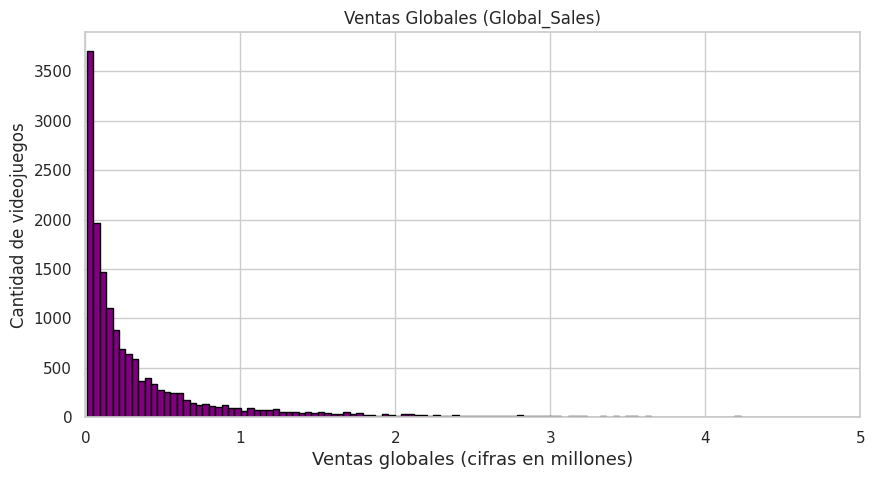

In [ ]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(df['Global_Sales'], bins=2000, color='purple', edgecolor='black')
plt.title('Ventas Globales (Global_Sales)', fontsize=12)
plt.xlabel('Ventas globales (cifras en millones)', fontsize=12+1)
plt.ylabel('Cantidad de videojuegos', fontsize=12)
plt.xlim(0, 5)
plt.grid(True)
plt.show()

El histograma de ventas globales evidencia que la mayoría de los videojuegos tienen ventas bajas, mientras que solo unos pocos alcanzan cifras muy altas. Esta distribución asimétrica demuestra que hay juegos muy exitosos que incrementan sustancialmente las ventas, pero la generalidad de ingresos que generan es mucho menor.

/tmp/ipython-input-209-333158026.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


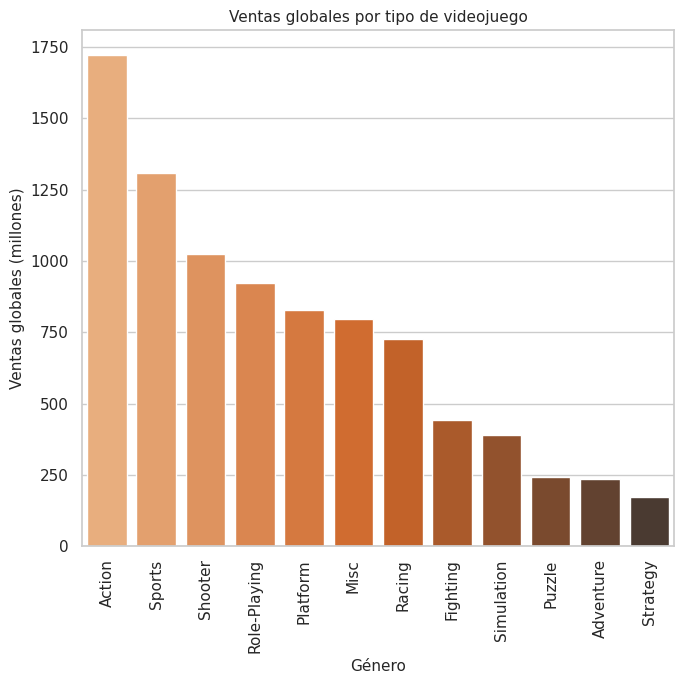

In [ ]:
ventas_por_genero = df.groupby('Genre', observed=True)['Global_Sales'].sum().sort_values(ascending=False)

ventas_por_genero = ventas_por_genero.reset_index()

plt.figure(figsize=(7, 7))
sns.barplot(
    data=ventas_por_genero,
    x='Genre',
    y='Global_Sales',
    palette='Oranges_d',
    order=ventas_por_genero['Genre'])

plt.title('Ventas globales por tipo de videojuego', fontsize=11)
plt.xlabel('Género', fontsize=11)
plt.ylabel('Ventas globales (millones)', fontsize=11)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


Se agruparon los datos por género (**Genre**) y se sumaron las ventas globales (**Global_Sales**) de todos los juegos de cada categoría. Las barras están ordenadas de mayor a menor, lo que permite identificar fácilmente qué tipo de juegos son más exitosos en términos de ventas.

Este análisis revela que los géneros "Action", "Sports" y "Shooter" dominan el mercado, mientras que otros como "Puzzle" o "Strategy" tienen ventas globales menores.

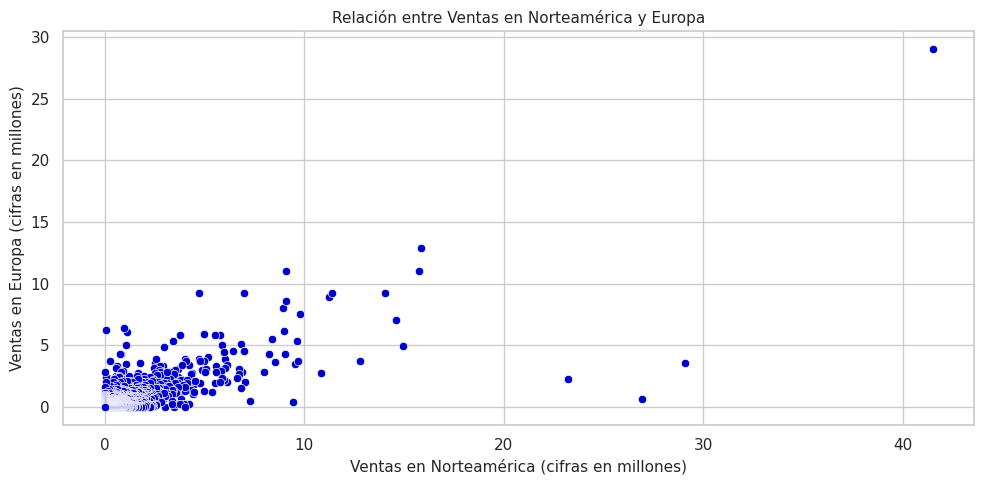

In [ ]:
plt.figure(figsize=(10, 5))

sns.scatterplot(
    data=df,
    x='NA_Sales',
    y='EU_Sales',
    color='mediumblue',
)

plt.title('Relación entre Ventas en Norteamérica y Europa', fontsize=11)
plt.xlabel('Ventas en Norteamérica (cifras en millones)', fontsize=11)
plt.ylabel('Ventas en Europa (cifras en millones)', fontsize=11)

plt.grid(True)
plt.tight_layout()
plt.show()


El gráfico de dispersión se usa para visualizar la relación entre las ventas en Norteamérica (**NA_Sales**) y Europa (**EU_Sales**). La nube de puntos muestra una tendencia positiva clara: los videojuegos que venden bien en Norteamérica tienden también a tener buenas ventas en Europa.
Aunque hay cierta dispersión, se puede afirmar que existe una correlación positiva entre ambas variables y los territorios son semejantes en sus tendencias de mercado.

/tmp/ipython-input-211-3914300484.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


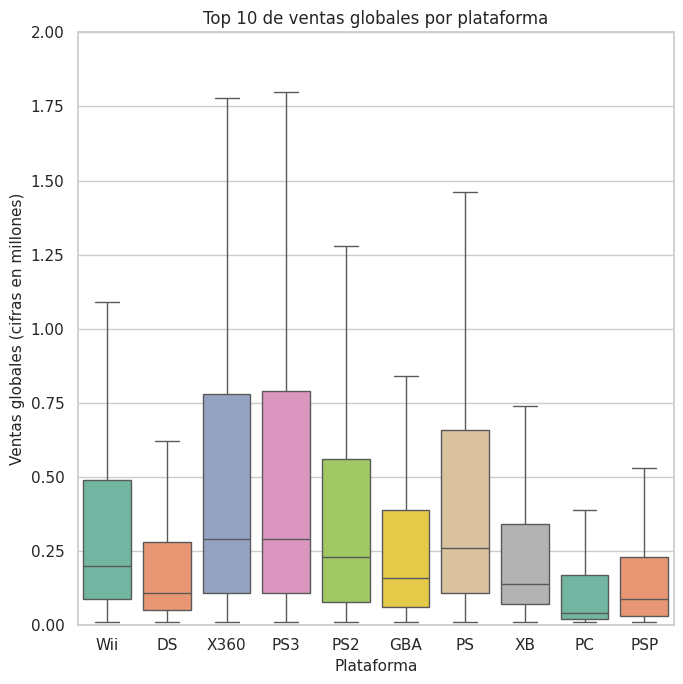

In [ ]:
plt.figure(figsize=(7, 7))
sns.set_style('whitegrid')

sns.boxplot(
    data=df_top_10,
    x='Platform',
    y='Global_Sales',
    palette='Set2',
    showfliers=False   )

plt.ylim(0, 2)

plt.title('Top 10 de ventas globales por plataforma', fontsize=12)
plt.xlabel('Plataforma', fontsize=11)
plt.ylabel('Ventas globales (cifras en millones)', fontsize=11)

plt.tight_layout()
plt.show()


Las plataformas con mayor dispersión muestran que entre todos los juegos que lanzaron tuvieron una mezcla de juegos con éxito bajo, mediano y algunos muy exitosos.
Otras plataformas con menor dispersión como PSP y GBA tuvieron un promedio de ventas más uniforme.

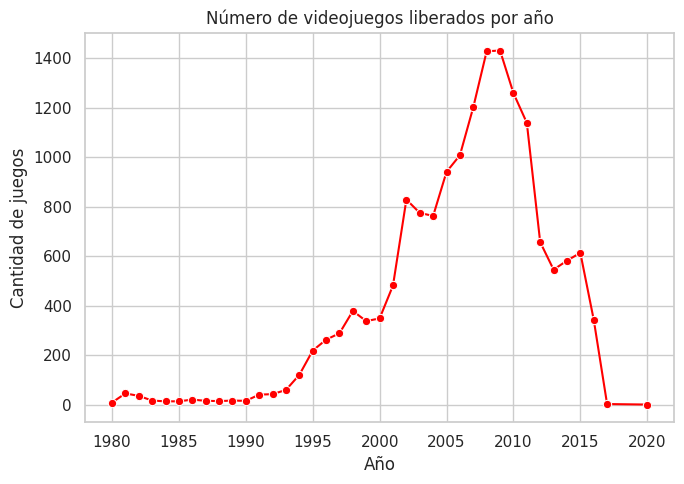

In [ ]:
lanzamientos_por_anio = df['Year'].value_counts().sort_index()

plt.figure(figsize=(7, 5))
sns.lineplot(x=lanzamientos_por_anio.index, y=lanzamientos_por_anio.values, marker='o', color='red')

plt.title('Número de videojuegos liberados por año', fontsize=12)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de juegos', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

El gráfico de líneas  muestra el número de videojuegos lanzados por año, usando la columna **Year**. Se puede observar un crecimiento progresivo en el número de juegos lanzados hasta cierto punto y luego una caída significativa que puede estar justificada en el cambio de plataformas que los usuarios prefieren.

##Parte 4: Conclusiones


Uno de los hallazgos que cabe resltar y que se sustenta en los datos de ventas globales por género, es que los juegos de acción lideran las ventas totales, seguidos por los juegos de deportes y los relacionados con disparos y armas. Esto indica una preferencia por juegos con dinámicas activas y competitivas.

En cuanto a los publicadores más presentes en el mercado, Electronic Arts, Activision y Nintendo se instauran como las compañías más relevantes, tanto por la cantidad de juegos que producen como por su presencia a lo largo del tiempo.

Respecto a las ventas regionales la sección de visualización de dispersión mostró una correlación positiva entre las ventas en Norteamérica y Europa, es decir, que los juegos que son exitosos en una región tienden a serlo también en la otra. Sin embargo, Japón es una región que tiene resultados menos cercanos a esta tendencia.

La última sección del análisis que muestra la línea temporal refleja  un crecimiento constante hasta los años 2000, seguido por una disminución bastante evidente, lo que puede relacionarse con la transición hacia plataformas digitales, la obsolecencia de algunas consolas y el cambio de preferencias de los jugadores.